**Univariate Analysis (Single Feature Analysis)**<br>

Objective: Understand the distribution and characteristics of a single feature using histograms boxplots, and violin plots.<br>

Dataset: Use the Iris dataset or any dataset with multiple numerical features.


Title: Histogram<br>

Task 1: Plot a histogram of the petal length feature.

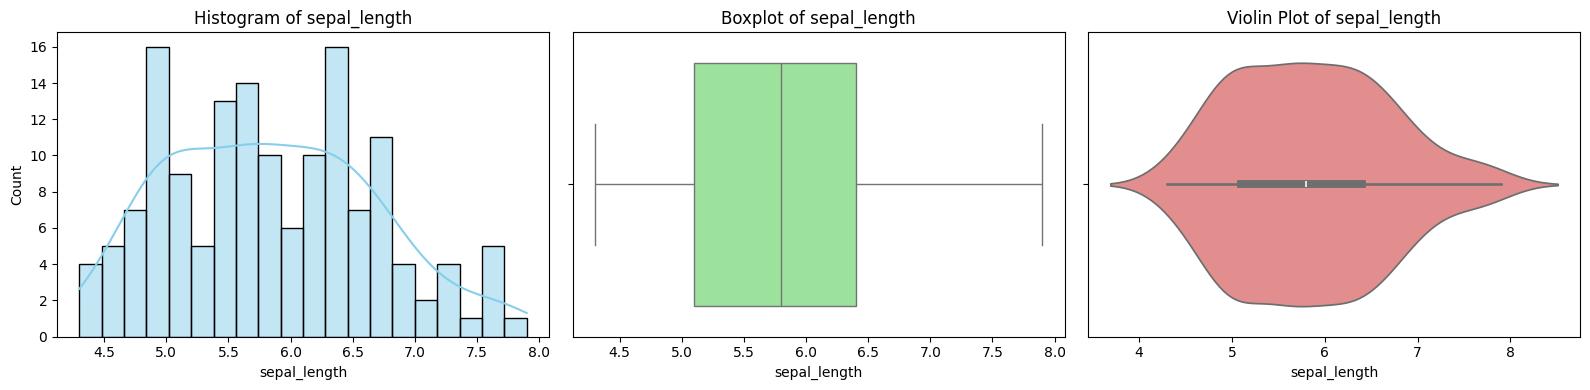

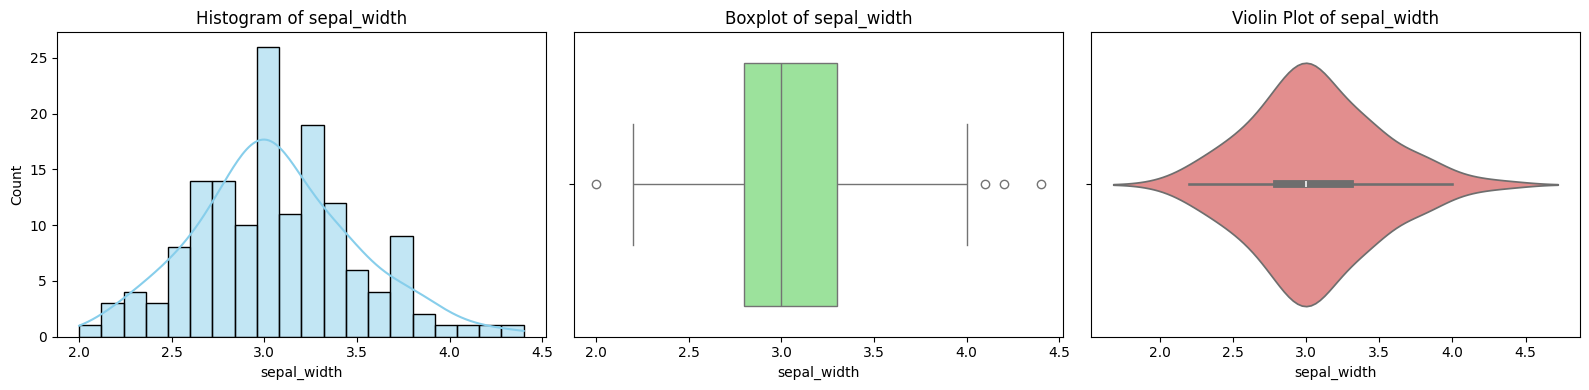

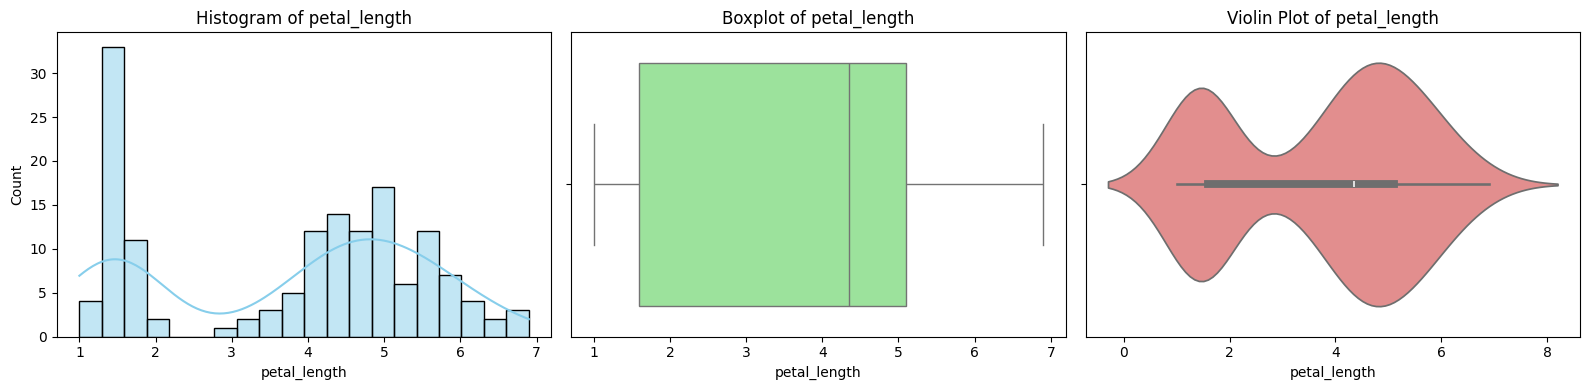

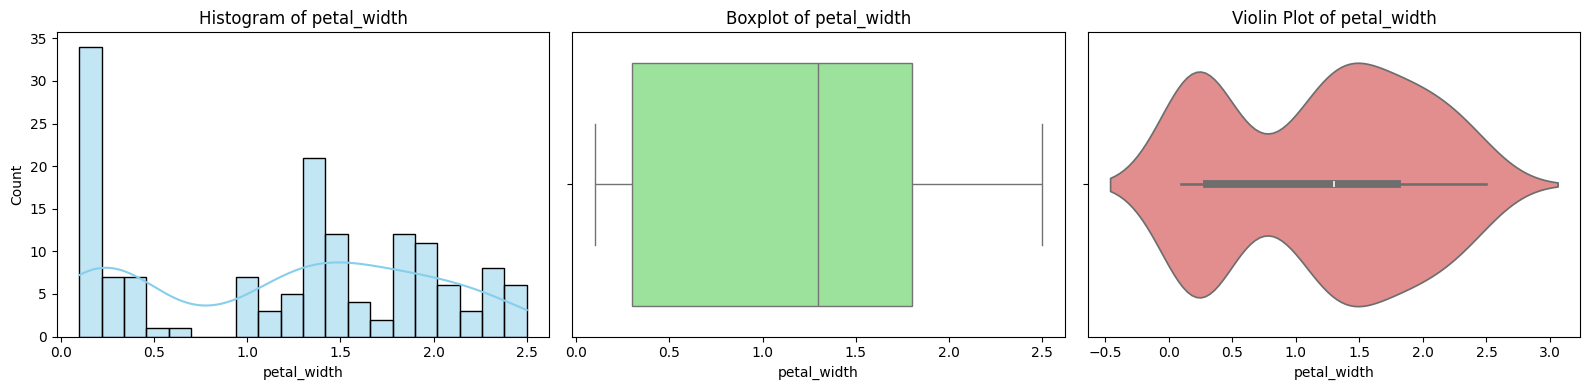

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset('iris')

# List of numerical features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Plotting Histograms, Boxplots, and Violin Plots
for feature in features:
    plt.figure(figsize=(16, 4))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=iris, x=feature, kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=iris[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=iris[feature], color='lightcoral')
    plt.title(f'Violin Plot of {feature}')
    
    plt.tight_layout()
    plt.show()


Title: Boxplots<br>

Task 2: Plot a boxplot of the petal length feature.

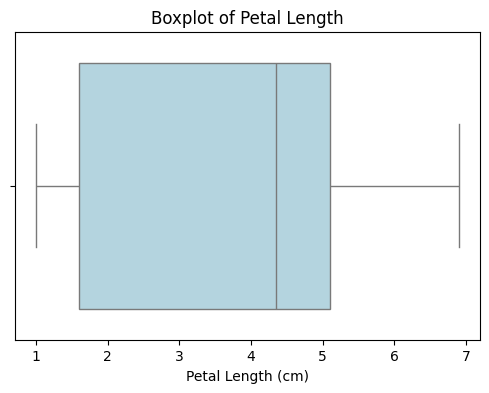

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Plot boxplot for petal_length
plt.figure(figsize=(6, 4))
sns.boxplot(x=iris['petal_length'], color='lightblue')
plt.title('Boxplot of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.show()


Title: Violin Plots<br>

Task 3: Plot a violin plot of the petal length feature.

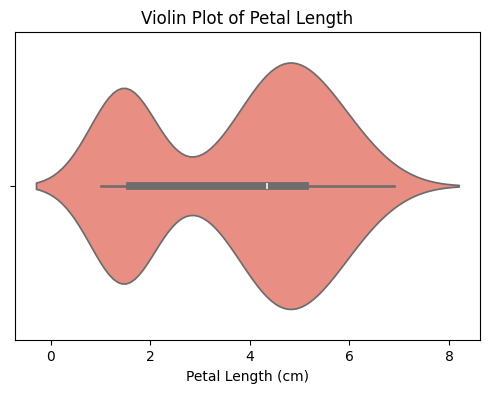

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Plot violin plot for petal_length
plt.figure(figsize=(6, 4))
sns.violinplot(x=iris['petal_length'], color='salmon')
plt.title('Violin Plot of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.show()


**Bivariate Analysis (Relationships Between Features)**<br>

Objective: Explore relationships between two features using scatter plots and correlation heatmaps.

Title: Scatter Plots<br>

Task 1: Create a scatter plot between sepal length and sepal width.<br>
Task 2: Scatter plot between petal length and petal width.<br>
Task 3: Scatter plot between sepal length and petal length.<br>

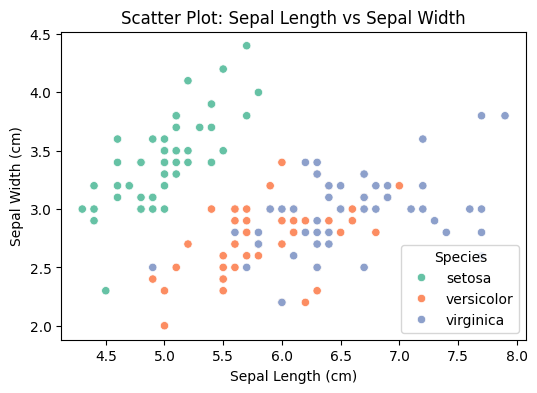

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset('iris')

# Task 1: Sepal Length vs Sepal Width
plt.figure(figsize=(6, 4))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='Set2')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


Title: Correlation Heatmaps<br>

Task 1: Generate a correlation heatmap of the dataset.<br>
Task 2: Highlight correlation between sepal length and petal length.<br>
Task 3: Highlight correlation between petal width and petal length.<br>

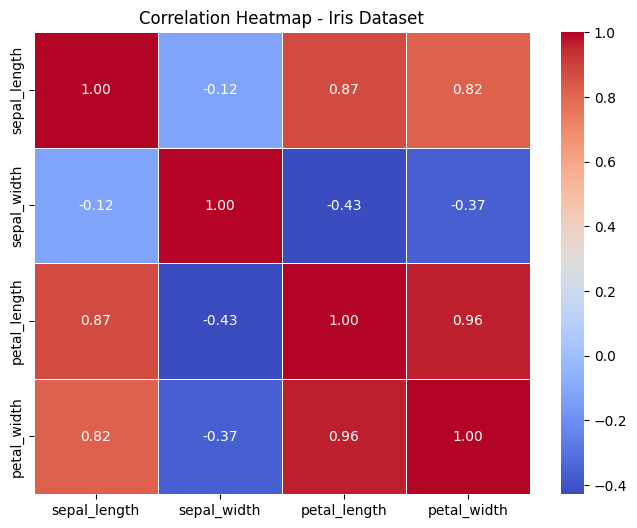

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
iris = sns.load_dataset('iris')

# Compute correlation matrix (numerical features only)
corr_matrix = iris.drop(columns='species').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Iris Dataset')
plt.show()


**Multivariate Analysis (Higher-Dimensional Data Relationships)**<br>
Objective: Analyze relationships in higher-dimensional data using pair plots and PCA.

Title: Pair Plots<br>

Task 1: Create a pair plot for the Iris dataset.<br>
Task 2: Focus on a subset of features (e.g., only petal dimensions).<br>
Task 3: Exclude one class to observe differences.

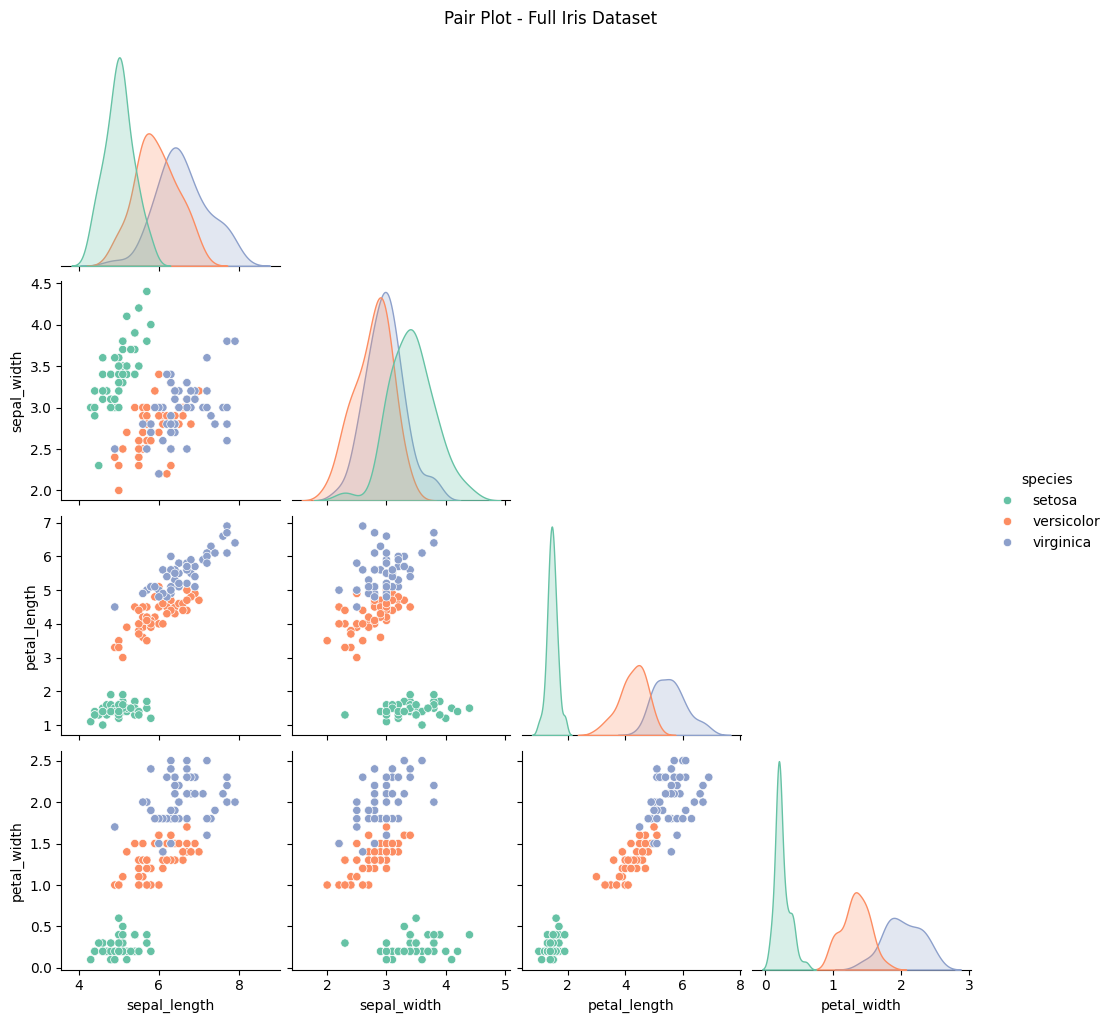

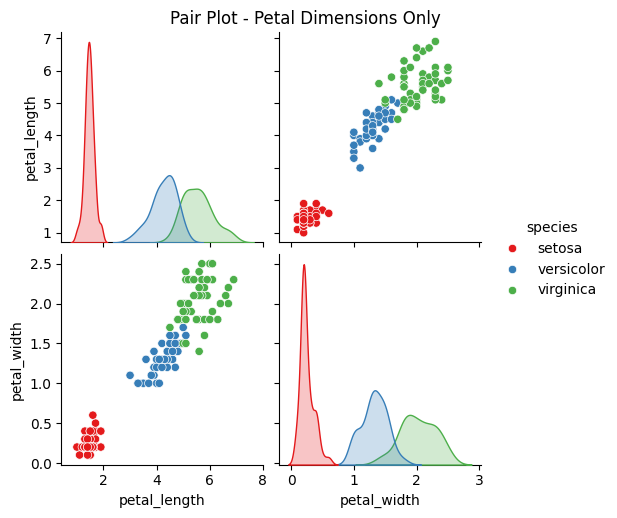

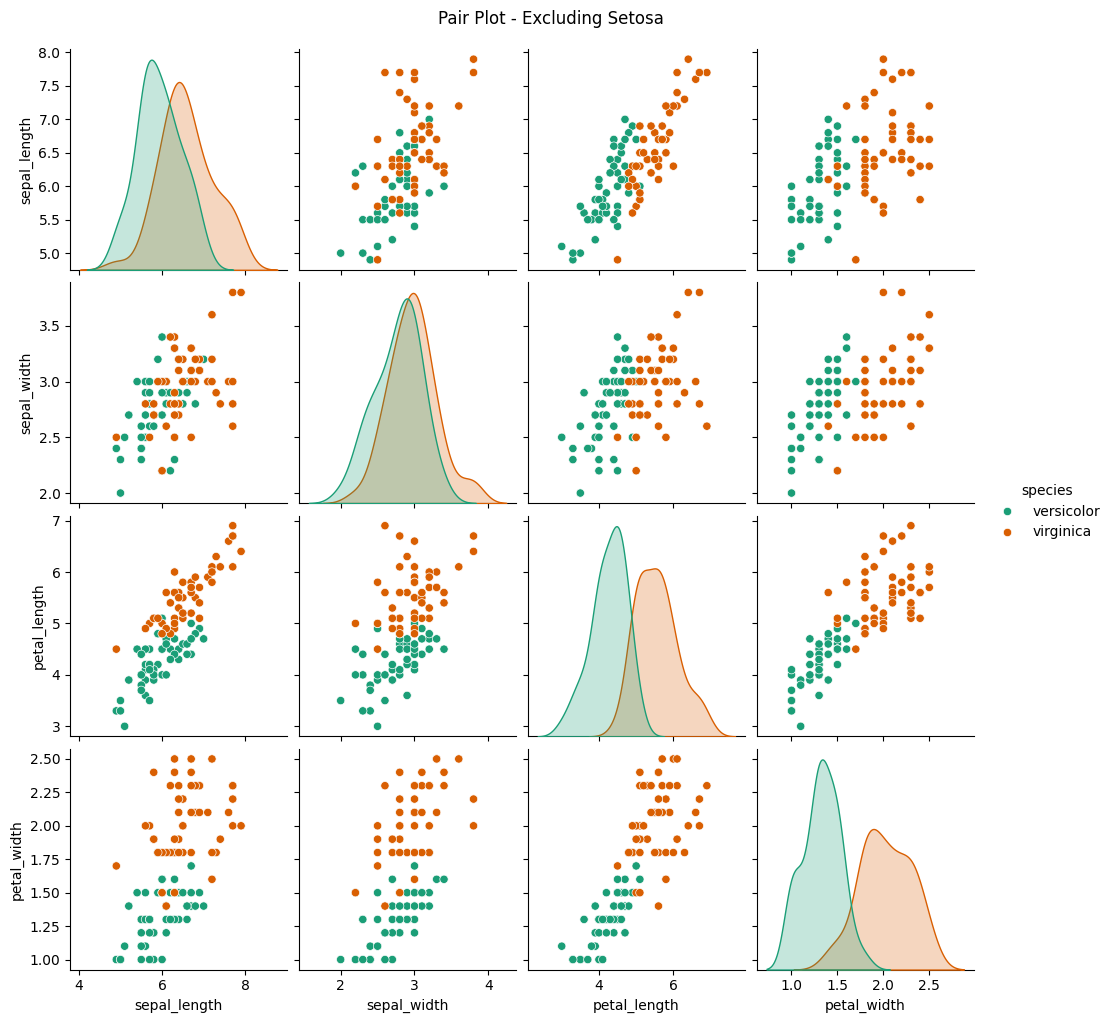

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Task 1: Full pair plot
sns.pairplot(iris, hue='species', palette='Set2', corner=True)
plt.suptitle('Pair Plot - Full Iris Dataset', y=1.02)
plt.show()

# Task 2: Pair plot with only petal dimensions
sns.pairplot(iris[['petal_length', 'petal_width', 'species']], hue='species', palette='Set1')
plt.suptitle('Pair Plot - Petal Dimensions Only', y=1.02)
plt.show()

# Task 3: Exclude Setosa and plot pairplot
iris_subset = iris[iris['species'] != 'setosa']
sns.pairplot(iris_subset, hue='species', palette='Dark2')
plt.suptitle('Pair Plot - Excluding Setosa', y=1.02)
plt.show()


Title: Principal Component Analysis (PCA)<br>

Task 1: Perform PCA and plot the first two principal components.<br>
Task 2: Visualize explained variance by each component.<br>
Task 3: Retain more components and visualize in 3D.

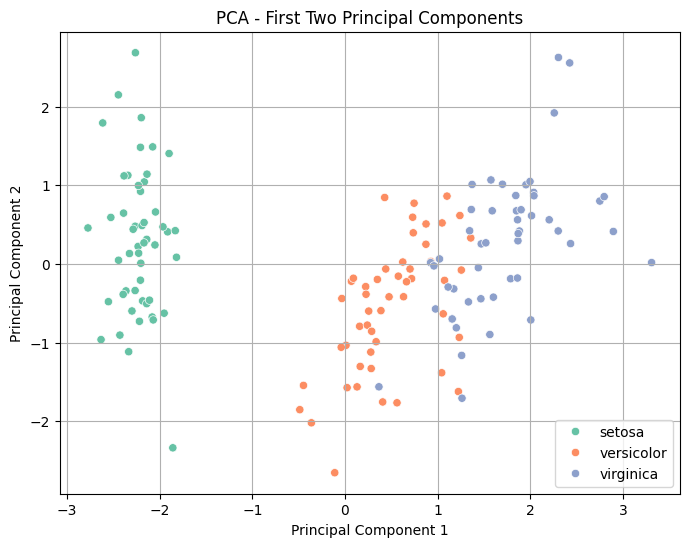

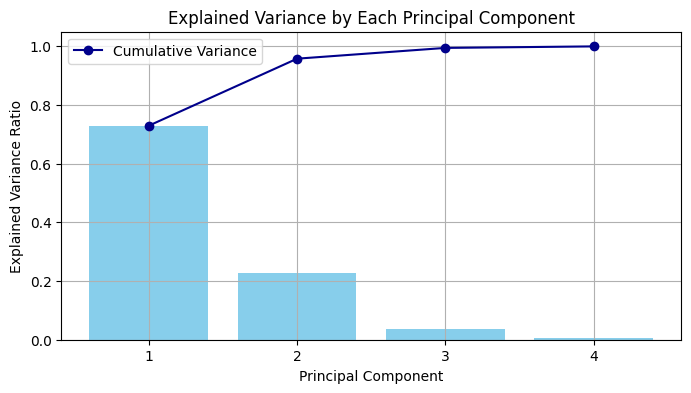

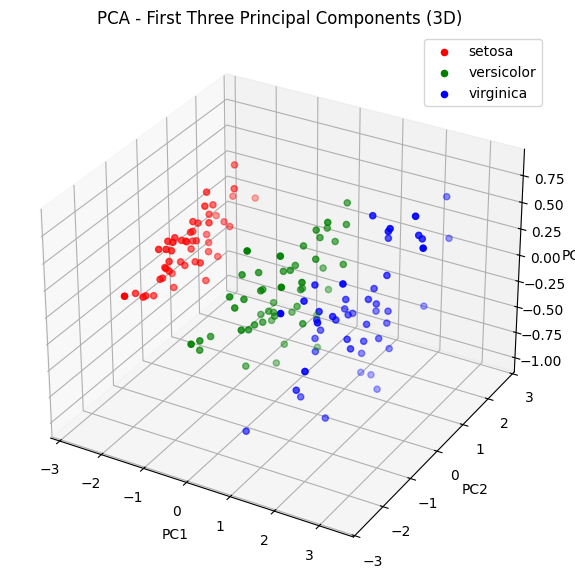

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Separate features and target
X = iris.drop(columns='species')
y = iris['species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 1: Perform PCA and plot first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create a DataFrame for the PCA components
pca_df_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['species'] = y

# Plot 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Visualize explained variance
pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='skyblue')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', color='darkblue', label='Cumulative Variance')
plt.xticks(range(1, len(explained_variance)+1))
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Task 3: Retain more components and visualize in 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create DataFrame for 3D plot
pca_df_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['species'] = y

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for species in pca_df_3d['species'].unique():
    subset = pca_df_3d[pca_df_3d['species'] == species]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=species, color=colors[species])

ax.set_title('PCA - First Three Principal Components (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()



**Statistical Analysis in EDA**<br>

Objective: Calculate basic statistical metrics and explore the relationship between features using correlation and covariance.<br>

Title: Descriptive Statistics<br>

Task 1: Calculate mean, median, and standard deviation of petal length.<br>
Task 2: Calculate skewness and kurtosis of sepal width.<br>
Task 3: Calculate mean, median, and standard deviation of sepal length.

In [69]:
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Task 1: Mean, Median, Std of Petal Length
petal_length_mean = iris['petal_length'].mean()
petal_length_median = iris['petal_length'].median()
petal_length_std = iris['petal_length'].std()

print("Task 1: Petal Length")
print(f"Mean: {petal_length_mean:.2f}")
print(f"Median: {petal_length_median:.2f}")
print(f"Standard Deviation: {petal_length_std:.2f}")
print()

# Task 2: Skewness and Kurtosis of Sepal Width
sepal_width_skew = skew(iris['sepal_width'])
sepal_width_kurt = kurtosis(iris['sepal_width'])

print("Task 2: Sepal Width")
print(f"Skewness: {sepal_width_skew:.2f}")
print(f"Kurtosis: {sepal_width_kurt:.2f}")
print()

# Task 3: Mean, Median, Std of Sepal Length
sepal_length_mean = iris['sepal_length'].mean()
sepal_length_median = iris['sepal_length'].median()
sepal_length_std = iris['sepal_length'].std()

print("Task 3: Sepal Length")
print(f"Mean: {sepal_length_mean:.2f}")
print(f"Median: {sepal_length_median:.2f}")
print(f"Standard Deviation: {sepal_length_std:.2f}")


Task 1: Petal Length
Mean: 3.76
Median: 4.35
Standard Deviation: 1.77

Task 2: Sepal Width
Skewness: 0.32
Kurtosis: 0.18

Task 3: Sepal Length
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83


Title: Correlation & Covariance<br>

Task 1: Compute correlation between sepal length and petal length.<br>
Task 2: Compute covariance between petal width and sepal width.<br>
Task 3: Determine the most correlated pair of features.<br>

In [70]:
import seaborn as sns
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Task 1: Correlation between Sepal Length and Petal Length
corr_sl_pl = iris['sepal_length'].corr(iris['petal_length'])
print("Task 1: Correlation between Sepal Length and Petal Length")
print(f"Correlation: {corr_sl_pl:.2f}")
print()

# Task 2: Covariance between Petal Width and Sepal Width
cov_pw_sw = iris['petal_width'].cov(iris['sepal_width'])
print("Task 2: Covariance between Petal Width and Sepal Width")
print(f"Covariance: {cov_pw_sw:.2f}")
print()

# Task 3: Most Correlated Pair of Features
# Drop non-numeric column
numeric_iris = iris.drop(columns='species')
corr_matrix = numeric_iris.corr().abs()

# Set diagonal to 0 to ignore self-correlation
import numpy as np
np.fill_diagonal(corr_matrix.values, 0)

# Find the most correlated pair
max_corr = corr_matrix.unstack().idxmax()
max_corr_value = corr_matrix.loc[max_corr]

print("Task 3: Most Correlated Pair of Features")
print(f"Most correlated pair: {max_corr[0]} & {max_corr[1]}")
print(f"Correlation value: {max_corr_value:.2f}")


Task 1: Correlation between Sepal Length and Petal Length
Correlation: 0.87

Task 2: Covariance between Petal Width and Sepal Width
Covariance: -0.12

Task 3: Most Correlated Pair of Features
Most correlated pair: petal_length & petal_width
Correlation value: 0.96
